## Exploratory Data Analysis

In [47]:
# import configuration file
from configurations import *

# import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
import missingno as msno

pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
from IPython.display import display
%matplotlib inline
import matplotlib.patches as mpatches

In [49]:
# all EDA will be performed using the data_train set
data_train.head()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,50-59,no-premeno,0-9,0-2,no,1,left,left_low,no
1,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,right_low,no
2,no-recurrence-events,40-49,premeno,25-29,0-2,no,1,right,right_low,no
3,recurrence-events,50-59,no-premeno,30-34,6-8,yes,2,left,right_low,yes
4,no-recurrence-events,30-39,premeno,25-29,0-2,no,1,left,central,no


### Identify the Target Attribute

The aim of the ML model is to **predict wether a given patient is subject to experience a recurrence** after being treated for breast cancer.<br>

Given the dataset I have identified ```'class'``` as the perfect target attribute.<br>
This feature is categorical and contains text-type data *(no-recurrence-events, recurrence-events)*<br>

### Datatype Exploration

The features in the dataset can be divided into groups:
- Categorical Features, *further sub-divided into*<br><br>
    - **Nominal Features** *(values aren't numerical and don't follow a natural order)*<br><br>
    - **Ordinal Features** *(values aren't numerical and follow a natural order)*<br><br>
- **Numerical Features** *(numerical values)*<br><br>

In [2]:
data_train.columns

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')

In [3]:
# DataFrame specification for each feature
df_datatype = pd.DataFrame.from_dict(
    {
        "class" : "nominal",
        "age" : "ordinal",
        "menopause": "nominal",
        "tumour_size": "ordinal",
        "inv_nodes": "ordinal",
        "node_caps": "nominal",
        "deg_malig": "numerical",
        "breast": "nominal",
        "breast_quad": "nominal",
        "irrad": "nominal"
    },
    orient = "index",
    columns=["data_type",]
)

display(df_datatype)

,data_type
class,nominal
age,ordinal
menopause,nominal
tumour_size,ordinal
inv_nodes,ordinal
node_caps,nominal
deg_malig,numerical
breast,nominal
breast_quad,nominal
irrad,nominal


### Identify Missing Values

<Axes: >

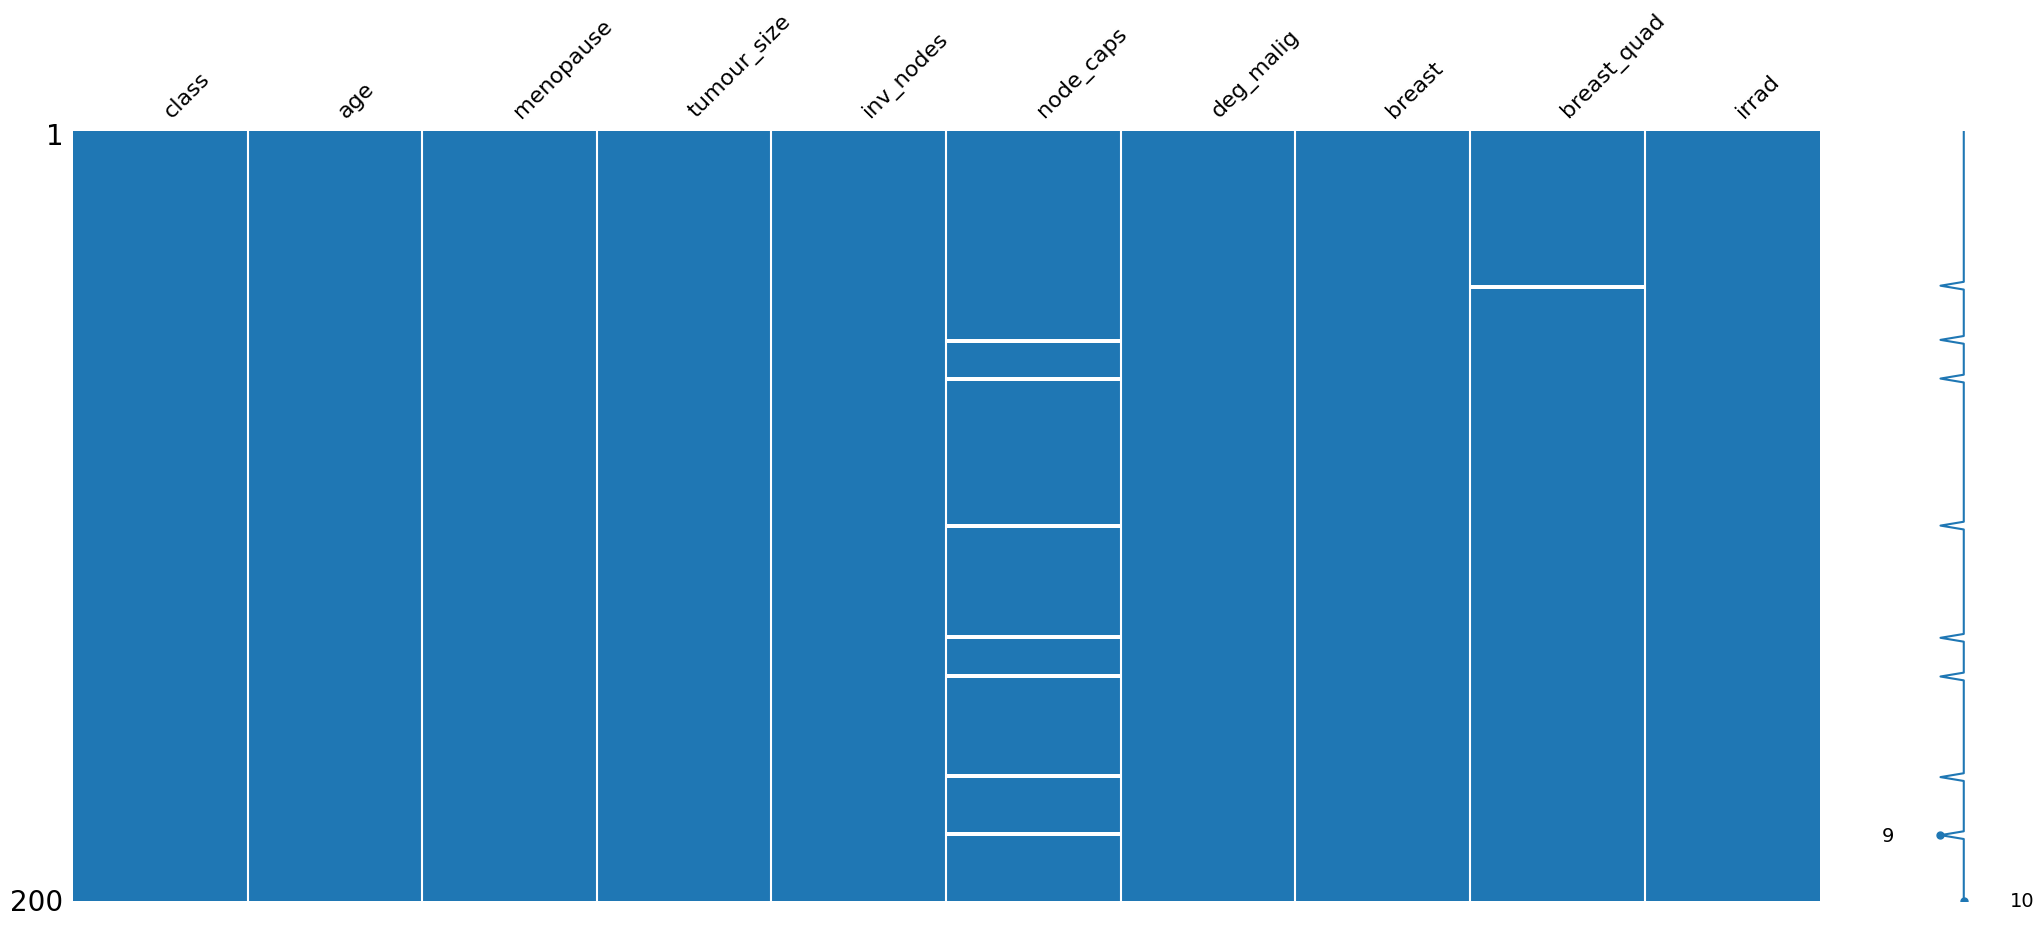

In [50]:
# identifying where the missing values are in the dataset
msno.matrix(data_train, color=(0.12156863, 0.46666667, 0.70588235))

In [51]:
# create a DataFrame with missing values informations
df_missing_value = data_train.isna().sum().to_frame(name="missing values")
df_missing_value['% missing values'] = ((data_train.isna().sum()) *100) / len(data_train)
display(df_missing_value)

,missing values,% missing values
class,0,0.0
age,0,0.0
menopause,0,0.0
tumour_size,0,0.0
inv_nodes,0,0.0
node_caps,7,3.5
deg_malig,0,0.0
breast,0,0.0
breast_quad,1,0.5
irrad,0,0.0


In [7]:
# visualizing the missing values inside the dataset
rows_with_missing_values = data_train[data_train.isnull().any(axis=1)]
rows_with_missing_values

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
40,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,NaN,no
54,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no
64,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes
102,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no
131,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes
141,no-recurrence-events,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes
167,recurrence-events,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes
182,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes


### Noisiness of Data

In [52]:
# assuming all features are noise-free
df_type_noise = pd.DataFrame(
    data={"type of noise": len(data_train.columns) * ["noise-free"]}, index=data_train.columns
)
display(df_type_noise)

,type of noise
class,noise-free
age,noise-free
menopause,noise-free
tumour_size,noise-free
inv_nodes,noise-free
node_caps,noise-free
deg_malig,noise-free
breast,noise-free
breast_quad,noise-free
irrad,noise-free


### Dataset Features Exploration

#### Nominal Features

In [55]:
# list only nominal features
list_nominal = df_datatype.loc[lambda x: x["data_type"] == "nominal"].index
print(list_nominal)
print(f"° {len(list_nominal)} nominal features")

Index(['class', 'menopause', 'node_caps', 'breast', 'breast_quad', 'irrad'], dtype='object')
° 6 nominal features


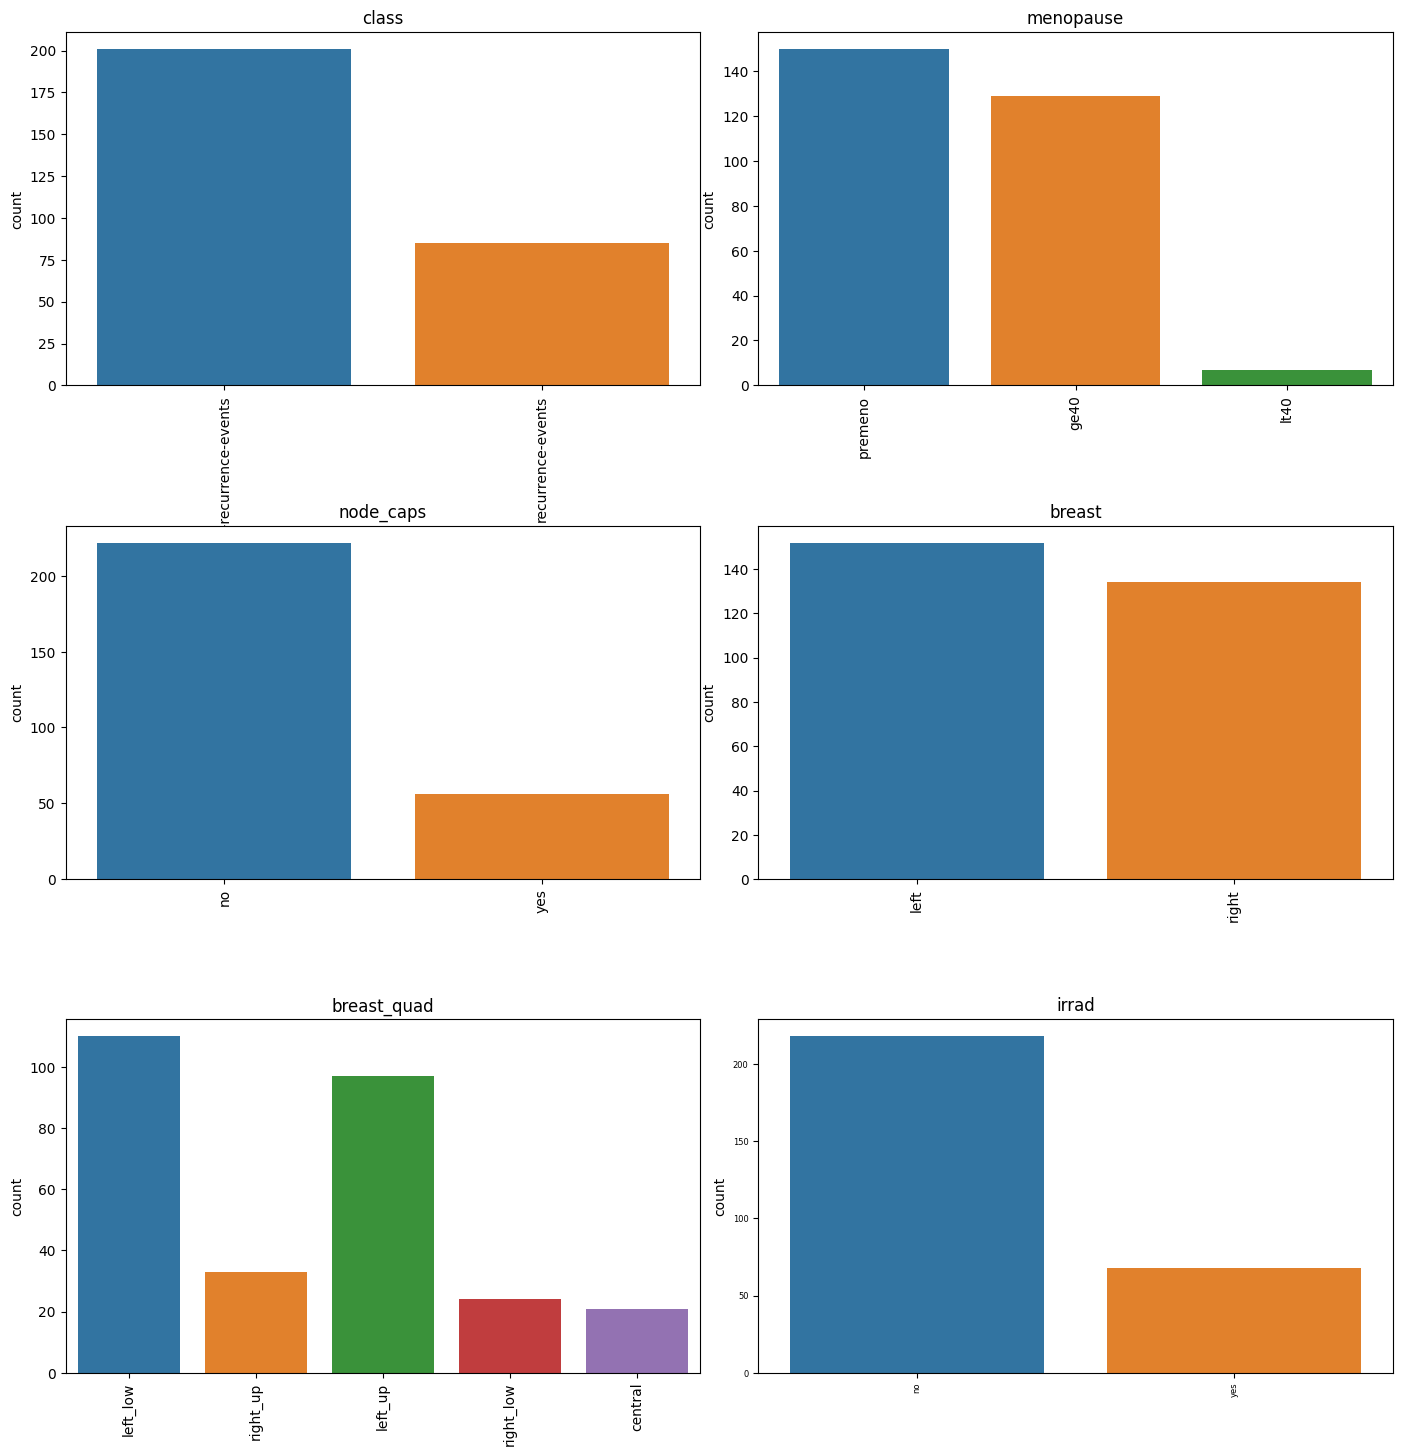

In [11]:
# create subplot
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
fig.tight_layout(h_pad=8.0)

# loop through tickers and axes
k = 0
for i in range(0, axs.shape[0]):
    for j in range(0, axs.shape[1]):
        # ad-hoc way to plot countplot in subplot
        sns.countplot(data=data, x=list_nominal[k], ax=axs[i, j])

        # chart formatting
        axs[i, j].tick_params(axis="x", rotation=90)
        axs[i, j].set_title(list_nominal[k])
        axs[i, j].set_xlabel("")
        k += 1

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

The target feature ```'class'``` is heavily imbalanced.

#### Ordinal Features

In [56]:
list_ordinal = df_datatype.loc[lambda x: x["data_type"] == "ordinal"].index
print(list_ordinal)
print(f"° {len(list_ordinal)} ordinal features")

Index(['age', 'tumour_size', 'inv_nodes'], dtype='object')
° 3 ordinal features


<Axes: xlabel='inv_nodes', ylabel='Count'>

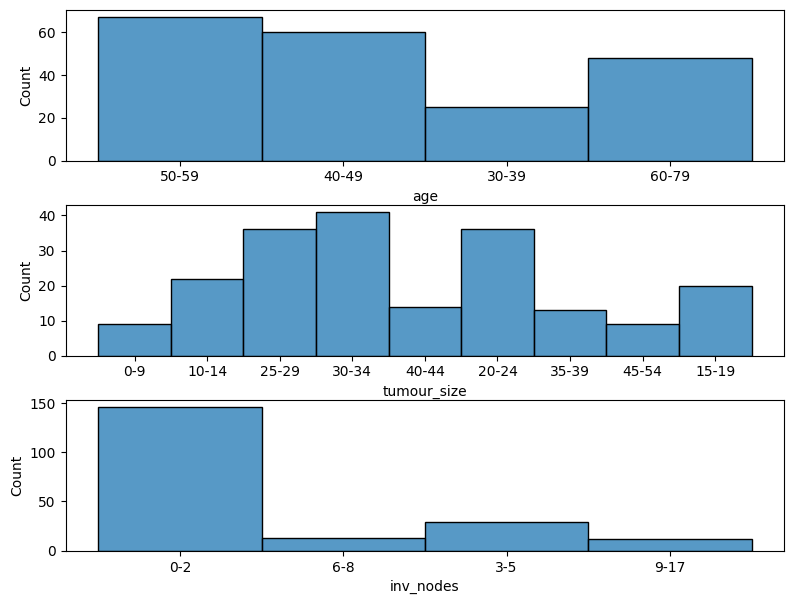

In [58]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
fig.tight_layout(w_pad=3.0)

sns.histplot(
    data=data_train, x=list_ordinal[0], binwidth=3, bins=40, discrete=True, ax=axs[0]
)
sns.histplot(
    data=data_train, x=list_ordinal[1], binwidth=3, bins=40, discrete=True, ax=axs[1]
)

sns.histplot(
    data=data_train, x=list_ordinal[2], binwidth=3, bins=40, discrete=True, ax=axs[2]
)

#### Numerical Features

In [60]:
list_numerical = df_datatype.loc[lambda x: x["data_type"] == "numerical"].index
print(list_numerical)
print(f"° {len(list_numerical)} numerical feature")

Index(['deg_malig'], dtype='object')
° 1 numerical feature


<Axes: xlabel='deg_malig', ylabel='Count'>

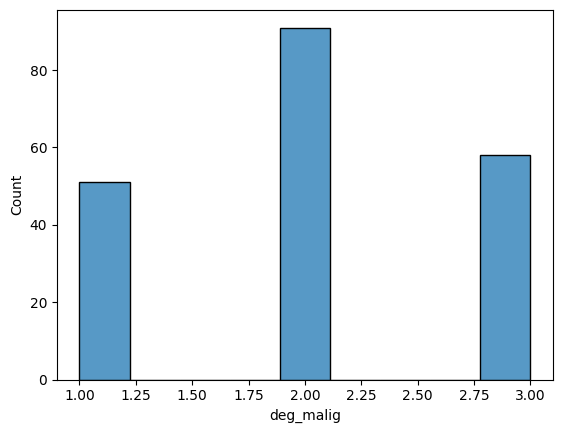

In [65]:
sns.histplot(data=data_train, x=list_numerical[0])

### Numerical Value Outliers

In [69]:
# initialize empty dataframe
df_outlier = pd.DataFrame()

# select threshold between {3,4}
thr = 3

# generate summary of outlier
for feat in list(list_numerical):
    df_outlier = pd.concat(
        [
            df_outlier,
            pd.DataFrame(
                data={
                    f"{thr}xstd": round(thr * data_train[feat].std(), 2),
                    f"n outlier ({thr}xstd)": data_train.loc[
                        lambda x: x[feat] > thr * x[feat].std(), feat
                    ].count(),
                    f"% outlier ({thr}xstd)": str(
                        round(
                            data_train.loc[
                                lambda x: x[feat] > thr * x[feat].std(), feat
                            ].count()
                            / data_train.shape[0],
                            2,
                        )
                        * 100
                    )
                    + " %",
                },
                index=[feat],
            ),
        ]
    )

display(df_outlier)

,3xstd,n outlier (3xstd),% outlier (3xstd)
deg_malig,2.22,58,28.999999999999996 %


### EDA Summary

In [70]:
df_datatype.join(df_missing_value).join(df_type_noise)

,data_type,missing values,% missing values,type of noise
class,nominal,0,0.0,noise-free
age,ordinal,0,0.0,noise-free
menopause,nominal,0,0.0,noise-free
tumour_size,ordinal,0,0.0,noise-free
inv_nodes,ordinal,0,0.0,noise-free
node_caps,nominal,7,3.5,noise-free
deg_malig,numerical,0,0.0,noise-free
breast,nominal,0,0.0,noise-free
breast_quad,nominal,1,0.5,noise-free
irrad,nominal,0,0.0,noise-free


### Target Feature Exploration

In [19]:
# computing count and proportion
pd.concat(
    [data[TARGET_NAME].value_counts(), data[TARGET_NAME].value_counts(normalize=True)], axis=1
).round(2)

,count,proportion
class,,
no-recurrence-events,201,0.7
recurrence-events,85,0.3


##### Prevalence

In [20]:
print(
    f"Prevalence for Target:{TARGET_NAME} = {data.loc[lambda x:x[TARGET_NAME]=='recurrence-events'].shape[0]/data.shape[0]:.2f}"
)

Prevalence for Target:class = 0.30


**Summary**

- Target feature `class` has a prevalence of 0.3 and heavily imbalanced;
- There are 6 nominal, 3 ordinal and 1 numerical features;
- There are 8 total missing values in `node_caps` (3.5%) and `breast_quad` (0.5%);
- Some features are highly imbalanced, clustering some of the values is expected to create a more predictive feature.